In [1]:
from selenium.webdriver import Chrome
import pandas as pd
import time

In [2]:
city = ['서울','대전','부산']

In [3]:
city_list=[]
for i in city:
    browser=Chrome()
    browser.get('https://www.tripadvisor.co.kr/Restaurants')
    time.sleep(5)
    qur = browser.find_elements_by_css_selector('.typeahead_input')
    qur = qur[0]
    qur.clear()
    qur.send_keys(i)
    time.sleep(5)
    btn = browser.find_elements_by_css_selector('#SUBMIT_RESTAURANTS > span.submit_text')
    btn = btn[0]
    btn.click()
    time.sleep(5)
    city_list.append((i, browser.current_url))
    browser.quit()
df = pd.DataFrame(city_list, columns=['city', 'url'])

In [4]:
df

,city,url
0,서울,https://www.tripadvisor.co.kr/Restaurants-g294...
1,대전,https://www.tripadvisor.co.kr/Restaurants-g297...
2,부산,https://www.tripadvisor.co.kr/Restaurants-g297...


In [5]:
link_list=[]
for city, url in zip(df['city'], df['url']):
    browser=Chrome()
    browser.get(url)
    time.sleep(10)
    more_links = browser.find_elements_by_css_selector('.property_title')
    for link in more_links:
        if link.get_attribute('href') is None:
            continue
        link_list.append((city, link.text, link.get_attribute('href')))
    browser.quit()

df2 = pd.DataFrame(link_list, columns=['도시','식당이름','url'])

In [18]:
df2.to_csv('url_list.csv', encoding='euc-kr', index=False)

In [8]:
df2.head()

,도시,식당이름,url
0,서울,더그리핀바,https://www.tripadvisor.co.kr/Restaurant_Revie...
1,서울,구스토 타코,https://www.tripadvisor.co.kr/Restaurant_Revie...
2,서울,헴라갓,https://www.tripadvisor.co.kr/Restaurant_Revie...
3,서울,카사블랑카 샌드위치,https://www.tripadvisor.co.kr/Restaurant_Revie...
4,서울,브라이 리퍼블릭,https://www.tripadvisor.co.kr/Restaurant_Revie...


In [12]:
import pandas as pd
from selenium.webdriver import Chrome
import time

In [13]:
df = pd.read_csv('url_list.csv', engine='python', encoding='euc-kr')
df.head()

,도시,식당이름,url
0,서울,더그리핀바,https://www.tripadvisor.co.kr/Restaurant_Revie...
1,서울,구스토 타코,https://www.tripadvisor.co.kr/Restaurant_Revie...
2,서울,헴라갓,https://www.tripadvisor.co.kr/Restaurant_Revie...
3,서울,카사블랑카 샌드위치,https://www.tripadvisor.co.kr/Restaurant_Revie...
4,서울,브라이 리퍼블릭,https://www.tripadvisor.co.kr/Restaurant_Revie...


In [14]:
review_list=[]
s = len('ui_bubble_rating bubble_')
for city, res, url in zip(df['도시'], df['식당이름'], df['url']):
    browser=Chrome()
    browser.get(url)
    time.sleep(2)
    more_links = browser.find_elements_by_css_selector('.ulBlueLinks')
    for link in more_links:
        try:
            link.click()
        except:
            pass
    reviews = browser.find_elements_by_css_selector('.review-container')
    for review in reviews:
        rating = review.find_element_by_css_selector('.ui_bubble_rating')
        cls = rating.get_attribute('class')
        score = int(cls[s:])
        comment = review.find_element_by_css_selector('.partial_entry')
        review_list.append((city, res, score, comment.text))
    browser.quit()
df = pd.DataFrame(review_list, columns=['도시', '식당이름', '스코어','리뷰'])

In [15]:
df

,도시,식당이름,스코어,리뷰
0,서울,더그리핀바,50,여자친구랑 같이 두번째 방문입니다.\n저번에 왔을 땐 비가 와서 홀 창가쪽에 앉았었...
1,서울,더그리핀바,50,모스코뮬을 좋아해 주문했는데 직원이 시그니처 칵테일이라고 스모키 모스코뮬을 추천했다...
2,서울,더그리핀바,50,숨겨진 곳 ! 이제 아지트가 될거 같습니다.. 분위기는 물론이고.. 바텐더분들 너무...
3,서울,더그리핀바,50,우연치않게 방문했던 곳인데 생각했던 것보다 더 고급지고 더 좋았습니다 직원분들도 너...
4,서울,더그리핀바,50,바에 앉아 있다가 테라스로 자리를 옮겨서 칵테일을 마셨는대 분위기도 너무 좋고 직원...
5,서울,더그리핀바,50,평소에 동대문 메리어트 레스토랑만 가다가 그리핀도 와봤는데 역시 기대를 저버리지 않...
6,서울,더그리핀바,50,퇴근길에 잠깐들러 바쪽에 앉았는대 바텐더님이 말도 걸어주면서 혼자 먹는다는 느낌 없...
7,서울,더그리핀바,50,분위기 너무 좋구요 9시 10시 11시에는 공연도 있어서 눈과 귀가 즐겁네요! 무엇...
8,서울,더그리핀바,30,친구와 간단히 술한잔하니 다녀왔습니딘.\n테라스에서 먹는 맛이 아주 인상적이었고\n...
9,서울,더그리핀바,50,평소 다니던 바의 바텐더에게 추천받아서 방문해 본 그리핀바. 호텔바는 처음인데 공연...


In [19]:
df.to_csv('review_list.csv', encoding='euc-kr', index=False)

In [23]:
df.shape

(896, 4)

In [24]:
df.head()

,도시,식당이름,스코어,리뷰
0,서울,더그리핀바,50,여자친구랑 같이 두번째 방문입니다.\n저번에 왔을 땐 비가 와서 홀 창가쪽에 앉았었...
1,서울,더그리핀바,50,모스코뮬을 좋아해 주문했는데 직원이 시그니처 칵테일이라고 스모키 모스코뮬을 추천했다...
2,서울,더그리핀바,50,숨겨진 곳 ! 이제 아지트가 될거 같습니다.. 분위기는 물론이고.. 바텐더분들 너무...
3,서울,더그리핀바,50,우연치않게 방문했던 곳인데 생각했던 것보다 더 고급지고 더 좋았습니다 직원분들도 너...
4,서울,더그리핀바,50,바에 앉아 있다가 테라스로 자리를 옮겨서 칵테일을 마셨는대 분위기도 너무 좋고 직원...


In [25]:
### make ttm

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
from konlpy.tag import Komoran
import re
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
tagger = Komoran()

In [32]:
def get_nouns(text):
    try :
        nouns = tagger.nouns(text)
        nouns = [word for word in nouns if len(word)>1]
        nouns = [word for word in nouns if not re.match(r'\d+', word)]
        return nouns
    except:
        nouns=''
        return nouns

In [33]:
cv = CountVectorizer(max_features=1000, tokenizer=get_nouns)

In [34]:
tdm = cv.fit_transform(df['리뷰'])

In [35]:
with open('data/trip.pkl','wb') as f:
    joblib.dump({'vectorizer': cv, 'tdm': tdm, 'score':df['스코어']}, f)

In [37]:
with open('data/trip.pkl', 'rb') as f:
    data = joblib.load(f)

In [38]:
data

{'vectorizer': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=1000, min_df=1,
         ngram_range=(1, 1), preprocessor=None, stop_words=None,
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=<function get_nouns at 0x000001E0C5BFF400>,
         vocabulary=None),
 'tdm': <896x1000 sparse matrix of type '<class 'numpy.int64'>'
 	with 7556 stored elements in Compressed Sparse Row format>,
 'score': 0      50
 1      50
 2      50
 3      50
 4      50
 5      50
 6      50
 7      50
 8      30
 9      50
 10     40
 11     20
 12     40
 13     40
 14     20
 15     20
 16     20
 17     50
 18     40
 19     50
 20     40
 21     50
 22     40
 23     40
 24     20
 25     40
 26     30
 27     40
 28     50
 29     40
        ..
 866    50
 867    40
 868    40
 869    30
 870    40
 871    50
 872    40
 873

In [39]:
locals().update(data)

In [40]:
word_count = pd.DataFrame({'단어' : vectorizer.get_feature_names(), '빈도' : tdm.sum(axis = 0).flat})
word_count.tail()

C:\Users\pioo0\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,단어,빈도
995,후회,2
996,훈제,4
997,휴게,3
998,흑맥주,2
999,흥인지문,2


In [41]:
sort_df = word_count.sort_values('빈도', ascending = False)
sort_df.head()

,단어,빈도
625,음식,232
3,가격,175
292,방문,138
335,분위기,117
833,추천,116


In [42]:
word_cloud_dict = dict(zip(word_count['단어'], word_count['빈도']))

list(word_cloud_dict.items())[100:105]

[('기가', 3), ('기계', 2), ('기념', 3), ('기념일', 3), ('기대', 25)]

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

In [45]:
wc = WordCloud(background_color= 'white', width= 900, height= 200, font_path='C:\Windows\Fonts\HYTBRB.TTF')

In [46]:
cloud = wc.fit_words(word_cloud_dict)

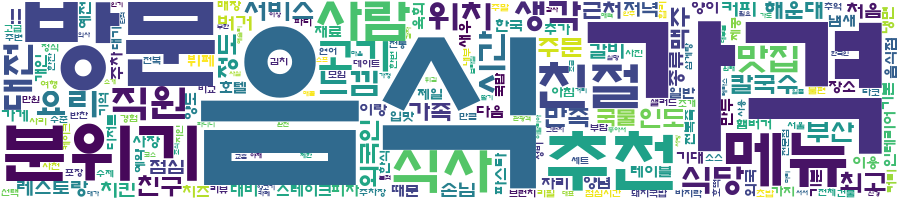

In [47]:
cloud.to_image()